<a href="https://colab.research.google.com/github/samnar2017/2023Python-Project1/blob/main/LagData1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
import scipy.stats as stats

# loading dataframe
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv' , index_col=0)
# Grouping the dataframe by 'School Name' and excluding the group containing NaN values
df1 = df.groupby('School Name').filter(lambda x: x['School Name'].notna().all())
df1['Mean Score'] = pd.to_numeric(df1['Mean Score'], errors='coerce')
# Getting unique group names 
group = df1['School Name'].unique()
# Selecting a random group name
random_group = random.choice(group)
# Extracting all rows from the selected group, as this is going to be our initial comparison point 
result = df1[df1['School Name'] == random_group]
#Exrtracting the remaing groups 
result2 = df1[df1['School Name'] != random_group]
# Displaying two date frames side by side 
display(result, result2)

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
17K539,High School for Service & Learning at Erasmus,High school,Algebra2/Trigonometry,2015,41,58.3,29,70.7,12,29.3,3,7.3,3,7.3
17K539,High School for Service & Learning at Erasmus,High school,Algebra2/Trigonometry,2016,22,61.7,9,40.9,13,59.1,1,4.5,1,4.5
17K539,High School for Service & Learning at Erasmus,High school,Common Core Algebra,2015,130,59.3,79,60.8,51,39.2,2,1.5,21,16.2
17K539,High School for Service & Learning at Erasmus,High school,Common Core Algebra,2016,130,65.2,52,40,78,60,8,6.2,57,43.8
17K539,High School for Service & Learning at Erasmus,High school,Common Core Algebra,2017,132,66.1,48,36.4,84,63.6,5,3.8,52,39.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17K539,High School for Service & Learning at Erasmus,High school,U.S. History and Government,2017,3,NaN,s,s,s,s,s,s,na,na
17K539,High School for Service & Learning at Erasmus,High school,U.S. History and Government,2017,87,70.3,23,26.4,64,73.6,19,21.8,na,na
17K539,High School for Service & Learning at Erasmus,High school,U.S. History and Government,2017,10,67.4,3,30,7,70,2,20,na,na


,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,s,s,s,s,s,s,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,s,s,s,s,s,s,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,s,s,s,s,s,s,na,na


In [4]:
#Let's pick a feature - number of rows each school has and number of rows we have in our randomly selected group and the rest of the groups: 
a = result.shape[0]
b = result2.shape[0]
display(a,b)

385

211946

In [5]:
result2

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,s,s,s,s,s,s,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,s,s,s,s,s,s,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,s,s,s,s,s,s,na,na
84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,s,s,s,s,s,s,na,na


In [6]:
#We can also be more specific and get the size of each group in groups outside the randomly selected group: 
remaining_grouped = df.loc[~df.index.isin(result.index)].groupby('School Name')
remaining_group_counts = remaining_grouped.size().reset_index(name='Regents Exam')
remaining_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
remaining_group_counts

,School Name,Regents Exam
0,47 The American Sign Language and English Seco...,356
1,A. Philip Randolph Campus High School,459
2,ACORN Community High School,364
3,Abraham Lincoln High School,480
4,Abraham Lincoln Yabc,248
...,...,...
1006,Young Women's Leadership School,378
1007,Young Women's Leadership School of Brooklyn,337
1008,Young Women's Leadership School of the Bronx,142
1009,"Young Women's Leadership School, Astoria",338


In [7]:
#we can also merge these two groups 
included_grouped = df1.loc[df1.index.isin(result.index)].groupby('School Name')
included_group_counts = included_grouped.size().reset_index(name='Regents Exam')
included_group_counts.rename(columns={'index': 'School Name'}, inplace = True)
included_group_counts
concat = pd.concat([included_group_counts,remaining_group_counts])
new_data = concat.reset_index(drop=True)
new_data

,School Name,Regents Exam
0,High School for Service & Learning at Erasmus,385
1,47 The American Sign Language and English Seco...,356
2,A. Philip Randolph Campus High School,459
3,ACORN Community High School,364
4,Abraham Lincoln High School,480
...,...,...
1007,Young Women's Leadership School,378
1008,Young Women's Leadership School of Brooklyn,337
1009,Young Women's Leadership School of the Bronx,142
1010,"Young Women's Leadership School, Astoria",338


In [8]:
#Let's find which school got the lowest, highest amount of Regent Exams

max_regents_index = new_data['Regents Exam'].idxmax()
min_regents_index = new_data['Regents Exam'].idxmin()
school_name = new_data.at[max_regents_index, 'School Name']
school_name2 = new_data.at[min_regents_index, 'School Name']
print(f"The school with the highest amount of Regents Exam is {school_name} with a highest number of Regents Exams of {remaining_group_counts['Regents Exam'].max()}")
print(f"The school with the smallest amount of Regents Exam is {school_name2} with a lowest number of Regents Exams of {remaining_group_counts['Regents Exam'].min()}")

#Then we can find the average, the median, the smallest and biggest value in the Count column to see where our randomly selected group is situated 
avg_value = round(remaining_group_counts['Regents Exam'].sum() / remaining_group_counts['Regents Exam'].count(), 2) 
median_value = round(remaining_group_counts['Regents Exam'].median(), 2)
dictionary = {'The average value of Regents Exam': avg_value, 'The median value of Regents Exam': median_value}
for key, value in dictionary.items():
  print(f"{key}: {value}")

# Now let's see how many schools are below or above the later values 
above_average = new_data[new_data["Regents Exam"] > avg_value].shape[0]
below_average = new_data[new_data["Regents Exam"] < avg_value].shape[0]
print("Number of school names with Regents Exams taken above average:", above_average)
print("Number of school names with Regents Exams taken below average:", below_average)

The school with the highest amount of Regents Exam is New Visions Charter High School for Advanced Math with a highest number of Regents Exams of 1337
The school with the smallest amount of Regents Exam is Academy for New Americans with a lowest number of Regents Exams of 5
The average value of Regents Exam: 209.64
The median value of Regents Exam: 180.0
Number of school names with Regents Exams taken above average: 486
Number of school names with Regents Exams taken below average: 526


Now we see that sample sizes are unequal, a standard average comparison may not accurately reflect the underlying population. We need to check for normality of the distributions and homogeneity of the variances of the groups. 


In [9]:
#Normality test
new_data['Regents Exam'] = new_data['Regents Exam'].astype(float)
stat, p = shapiro(new_data['Regents Exam'])


print('Shapiro-Wilk Test Statistic: %.3f, p-value: %.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')



Shapiro-Wilk Test Statistic: 0.868, p-value: 0.000
Sample does not look Gaussian (reject H0)


The sample does not follow a normal distribution then we need to use 

In [10]:
# #Now let's see if  the schools having highest number of Regent Exams taken has performed better in terms of Number Scoring 80 or Above than the schools having fewer number of Regent Exams taken : 
grouped = result2.groupby('School Name')
avg = grouped['Mean Score'].mean().round(decimals=2)
avg = avg.reset_index()
grouped2 = result.groupby('School Name')
avg2 = grouped2['Mean Score'].mean().round(decimals=2)
avg2 = avg2.reset_index()
new_data2 = pd.concat([avg,avg2], axis= 0)
# Now joining new_data and new_data2
new_table = pd.merge(new_data, new_data2, how="left", on = "School Name")
new_table['Mean Score'].fillna(0, inplace=True)
new_table

,School Name,Regents Exam,Mean Score
0,High School for Service & Learning at Erasmus,385.0,62.67
1,47 The American Sign Language and English Seco...,356.0,60.70
2,A. Philip Randolph Campus High School,459.0,65.53
3,ACORN Community High School,364.0,60.07
4,Abraham Lincoln High School,480.0,61.62
...,...,...,...
1007,Young Women's Leadership School,378.0,72.13
1008,Young Women's Leadership School of Brooklyn,337.0,65.78
1009,Young Women's Leadership School of the Bronx,142.0,69.98
1010,"Young Women's Leadership School, Astoria",338.0,71.64


In [11]:
# homogeneity of variance test
# Perform the Levene test 
col1 = new_table['Regents Exam']
col2 = new_table['Mean Score']

# perform the Levene test
stat, p = levene(col1, col2)

# interpret the test results
alpha = 0.05
if p > alpha:
    print('The variances are equal (fail to reject H0)')
else:
    print('The variances are not equal (reject H0)')

The variances are not equal (reject H0)


The dataset isn't Gaussian ( not a normal distribution) and  the variances are not equal . To compare the means of all 1012 groups, we can do a one-way analysis of variance (ANOVA) which will account for the unequal sample sizes and determine if the difference between the means is statistically significant. 

In [12]:
# Group the data by 'School Name'
grouped_data_dropna = df1.dropna()
grouped_data = grouped_data_dropna.groupby(by='School Name')

# Extract the 'Percent Scoring 80 or Above' column for each group
population_means = [grouped['Percent Scoring 80 or Above'] for name, grouped in grouped_data]

# Perform the ANOVA test on the extracted data
f_value, p_value = stats.f_oneway(*population_means)

# Print the results
print("F-value: ", f_value)
print("P-value: ", p_value)

F-value:  163.00580475210953
P-value:  0.0


The F-test result with a p-value of 0.0 suggests that the difference in means between the populations is statistically significant, and it is accurate to compare these populations by using the 'Percent Scoring 80 or Above' vector. However, it is important to note that a significant result in statistical testing does not guarantee practical or real-world significance. Further analysis, such as effect size measures and post-hoc tests, can provide more insight into the practical significance of the results.

We can represent the new_table heatmap. 

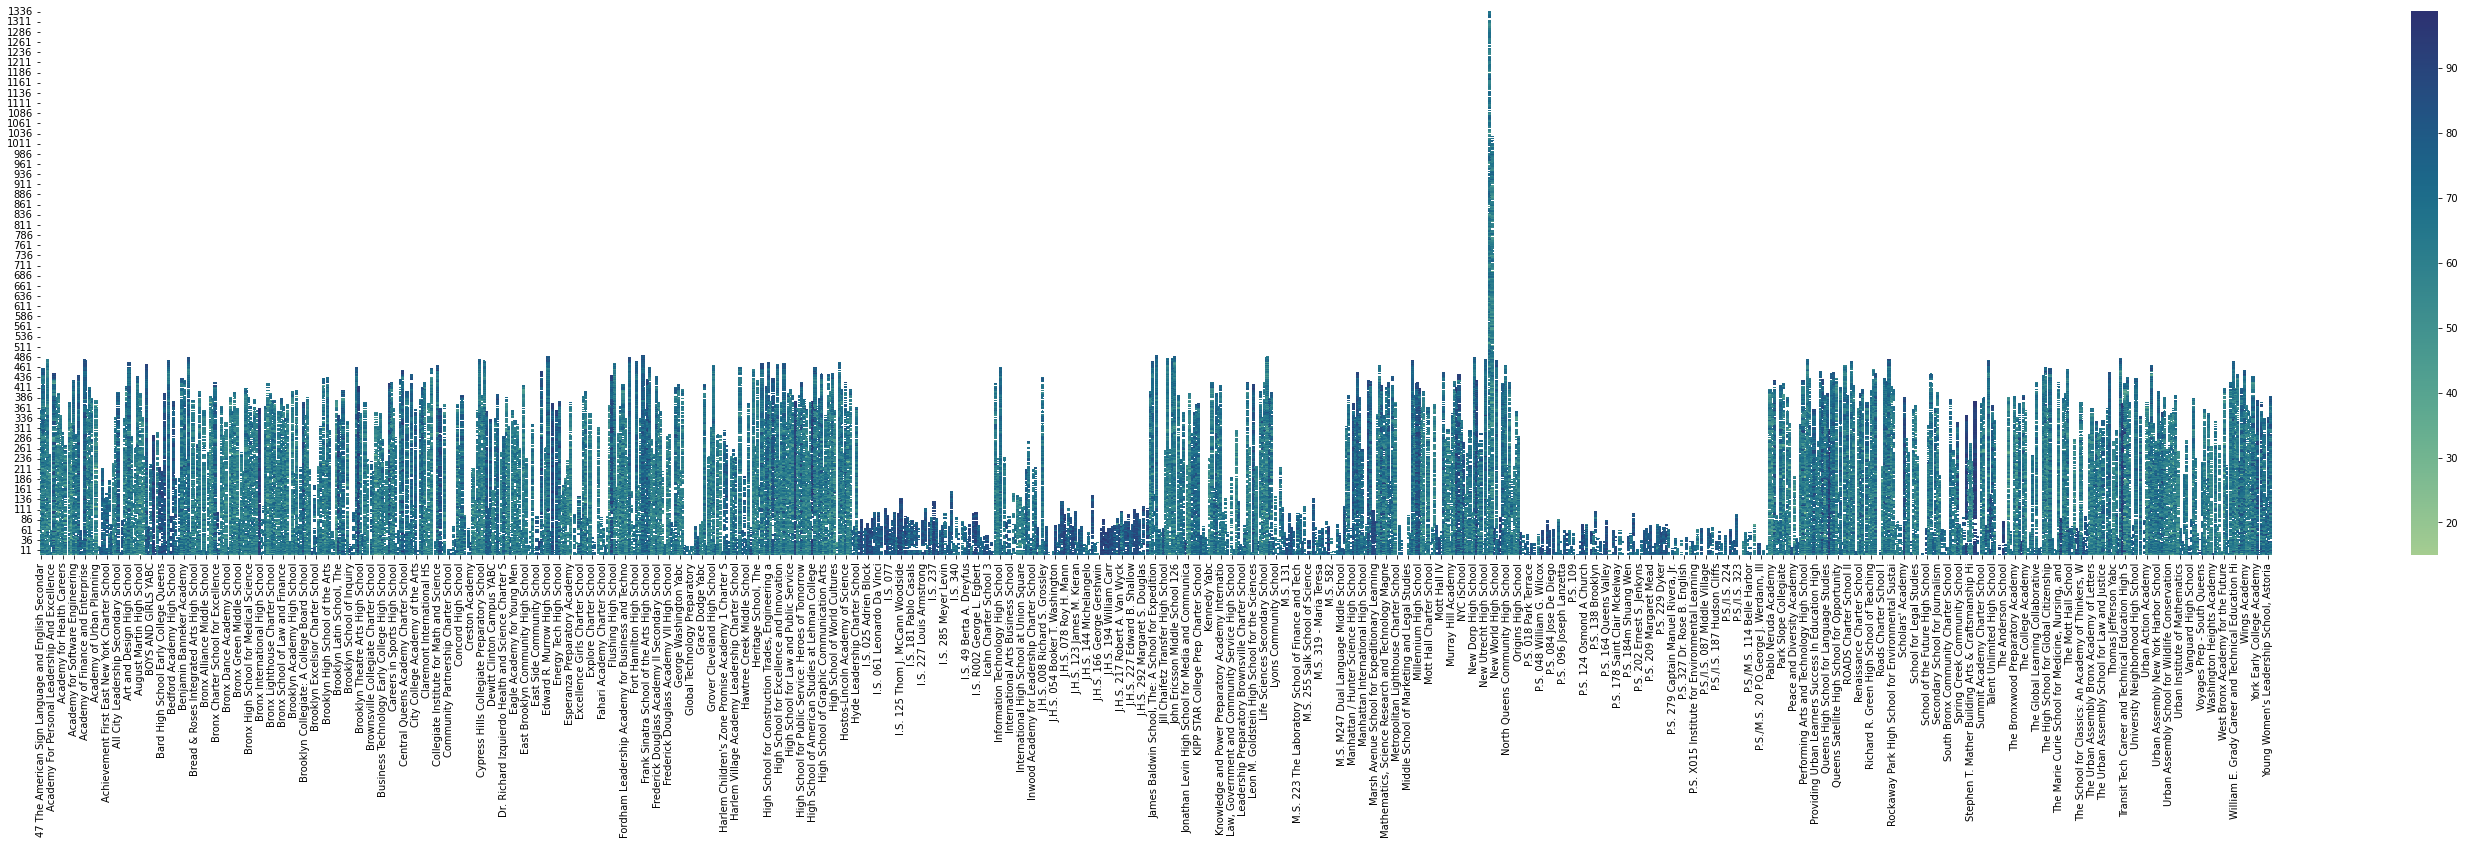

In [26]:
#Regrouping the data
concat = pd.concat([result,result2])
new_result = concat.reset_index(drop=True)
new_result = new_result[["School Name", "Mean Score"]]
new_result = new_result.set_index("School Name")
#Creating a dictionary 
new_dict = dict(new_result.groupby('School Name')['Mean Score'].apply(list))
#Creating dataframe from a dictionary where entries have different lengths
dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in new_dict.items() })
#Creating a Seaborn Palette That Highlights Maximum Value to easily focus on who has the max mean scores
fig, ax = plt.subplots(figsize=(50,10)) 
cmap = sns.color_palette("crest", as_cmap=True)
heat = sns.heatmap(dict_df.sort_index(ascending=False), annot=False,annot_kws={"fontsize":12}, cmap=cmap, ax = ax)
heat